<a href="https://colab.research.google.com/github/marcinwolter/MachineLearnin2019/blob/master/mnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 10 #20

# the data, split between train and test sets
(x_train, y_train0), (x_test, y_test0) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train0, num_classes)
y_test = keras.utils.to_categorical(y_test0, num_classes)



60000 train samples
10000 test samples


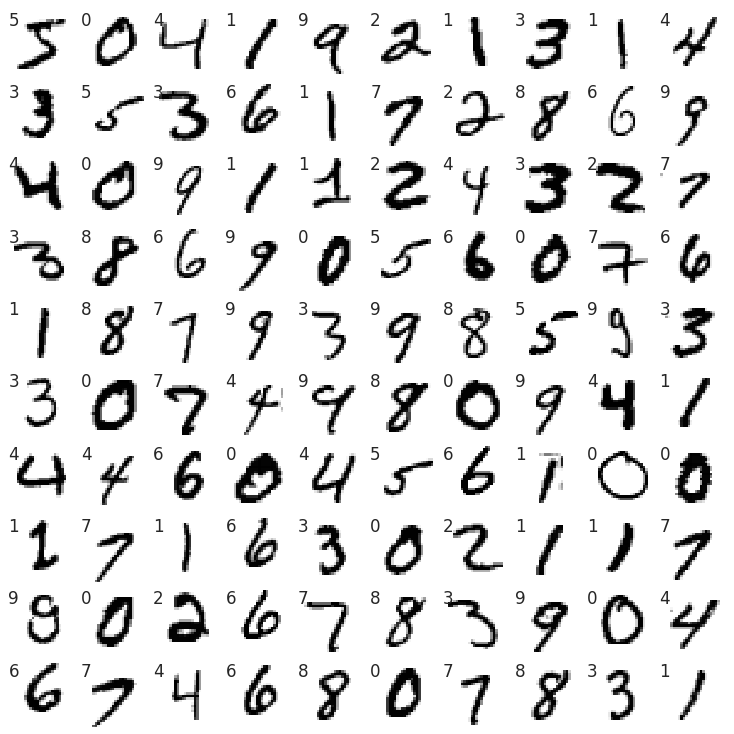

In [38]:
#visualize the digits

fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train0[i]))

In [39]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2723 - acc: 0.9151 - val_loss: 0.1177 - val_acc: 0.9625
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.1172 - acc: 0.9654 - val_loss: 0.0949 - val_acc: 0.9711
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0885 - acc: 0.9737 - val_loss: 0.0909 - val_acc: 0.9731
Epoch 4/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0751 - acc: 0.9790 - val_loss: 0.0961 - val_acc: 0.9782
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0684 - acc: 0.9820 - val_loss: 0.0795 - val_acc: 0.9806
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0642 - acc: 0.9836 - val_loss: 0.0800 - val_acc: 0.9810
Epoch 7/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0586 - acc: 0.9847 - val_loss: 0.0889 - val_acc

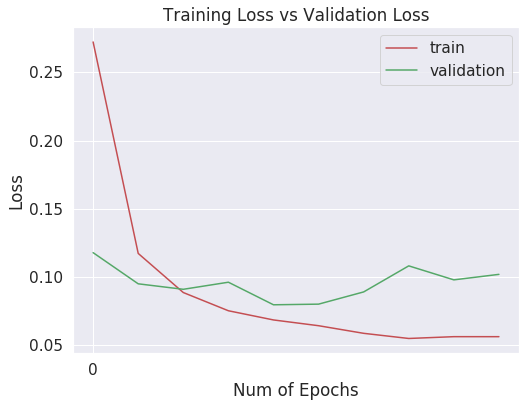

In [41]:
# Plots for training and testing process: loss and accuracy

n_epochs = len(history.history['loss'])

#plt.figure(0)
#plt.plot(history.history['categorical_accuracy'],'r')
#plt.plot(history.history['val_categorical_accuracy'],'g')
#plt.xticks(np.arange(0, n_epochs, 10.0))
#plt.rcParams['figure.figsize'] = (8, 6)
#plt.xlabel("Num of Epochs")
#plt.ylabel("Accuracy")
#plt.title("Training Cat_Accuracy vs Validation Cat_Accuracy")
#plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()



In [42]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1018258113615068
Test accuracy: 0.9809


In [43]:

# evaluate loaded model
scores_train = model.evaluate(x_train, y_train, verbose=0)
scores_test  = model.evaluate(x_test,  y_test,  verbose=0)

print("Accuracy Train: %.2f%% , Test: %.2f%% " % (scores_train[1]*100, scores_test[1]*100 ))

Accuracy Train: 99.48% , Test: 98.09% 


In [44]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)

y_pred = np.argmax(Y_pred, axis=1)

y_test2 = np.argmax(y_test, axis=1)



#confusion matrix
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)



[[ 971    0    1    0    0    1    4    2    1    0]
 [   0 1124    0    2    0    0    2    0    7    0]
 [   4    0 1013    0    2    0    4    5    4    0]
 [   0    0    4  999    0    2    0    3    1    1]
 [   0    0    1    0  972    0    7    0    0    2]
 [   4    1    0   18    1  857    5    1    4    1]
 [   4    2    0    0    2    2  948    0    0    0]
 [   0    2    8    2    6    0    0 1001    7    2]
 [   4    0    0    3    7    2    3    2  951    2]
 [   2    2    0    4   20    1    0    5    2  973]]


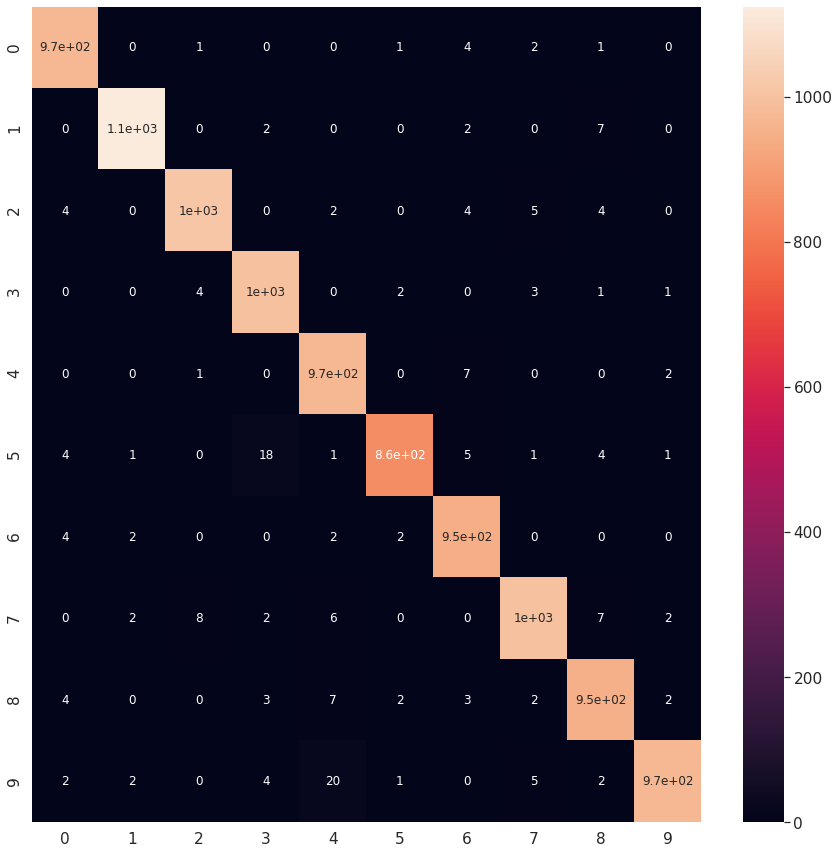

In [45]:
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),range(10))
#                     range(num_classes),
#                  range(num_classes))
#plt.figure(figsize = (10,7))
plt.figure(2,figsize = (15,15) )
sn.set(font_scale=1.4) #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()


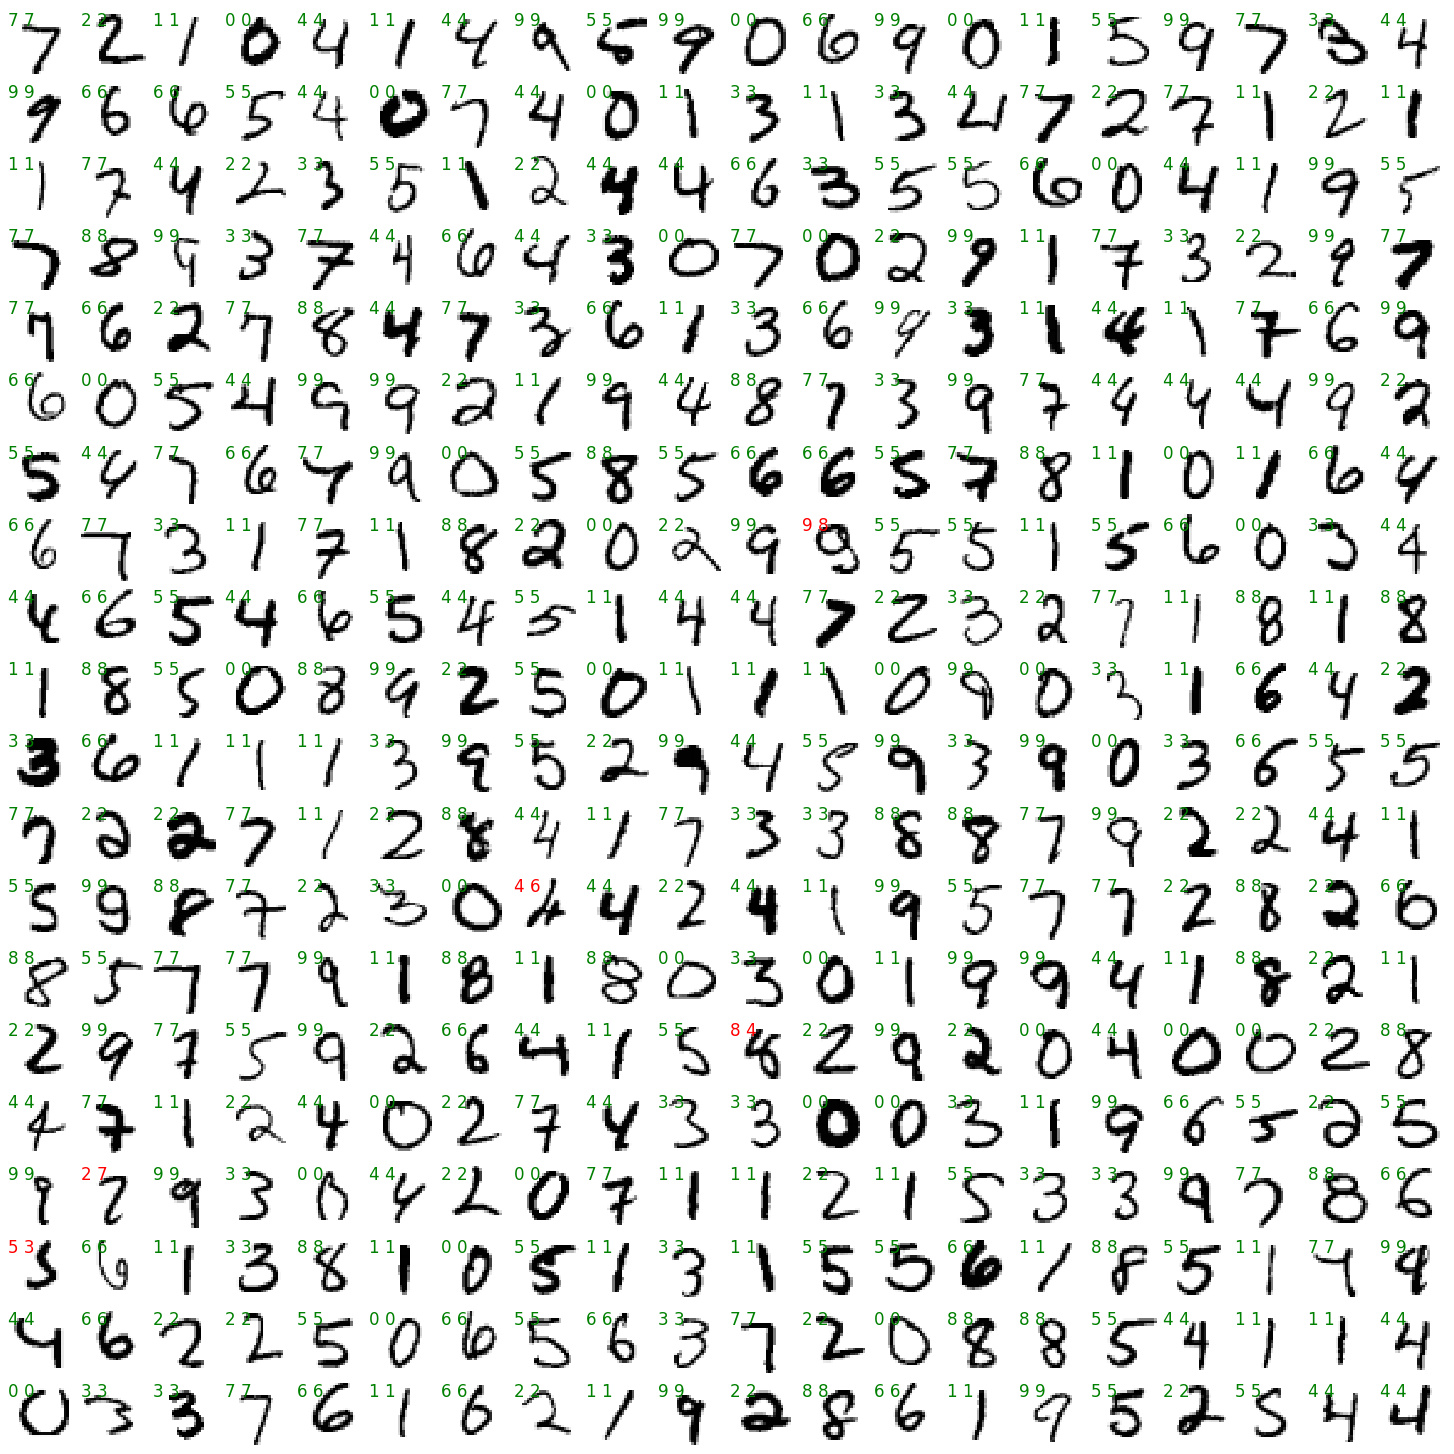

In [46]:
# use the model to predict the labels of the test data
predicted = model.predict(x_test)
expected = y_test0



# Plot the prediction
fig = plt.figure(figsize=(20, 20))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
for i in range(400):
    ax = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if np.argmax(predicted[i]) == expected[i]:
        ax.text(0, 7, str(expected[i])+" "+str(np.argmax(predicted[i])), color='green')
    else:
        ax.text(0, 7, str(expected[i])+" "+str(np.argmax(predicted[i])), color='red')